In [10]:
%reset
'''
Dataset of 25,000 movies reviews from IMDB, labeled by sentiment (positive/negative). 
Reviews have been preprocessed, and each review is encoded as a sequence of word indexes (integers). 
For convenience, words are indexed by overall frequency in the dataset, 
so that for instance the integer "3" encodes the 3rd most frequent word in the data. 
This allows for quick filtering operations such as: "only consider the top 10,000 most common words, 
but eliminate the top 20 most common words"
'''
import os
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import tensorflow as tf

import warnings
warnings.filterwarnings('ignore')

Once deleted, variables cannot be recovered. Proceed (y/[n])?  y


In [11]:
MAX_FEATURES = 10000

In [14]:
%%time
# Get data.
(x_train_raw, y_train_raw), (x_test_raw, y_test_raw) = (
    tf.keras.datasets.imdb.load_data(num_words=MAX_FEATURES))

CPU times: user 4.38 s, sys: 279 ms, total: 4.66 s
Wall time: 4.69 s


In [13]:
def plot_history(history):
    acc = history.history['acc']
    val_acc = history.history['val_acc']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs = range(1, len(acc) + 1)

    plt.plot(epochs, acc, 'bo', label='Training accuracy')
    plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
    plt.title('Training and validation accuracy')
    plt.legend()

    plt.figure()
    plt.plot(epochs, loss, 'bo', label='Training loss')
    plt.plot(epochs, val_loss, 'b', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()
    plt.show()

### Simple embedding layer

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, 20, 8)             80000     
_________________________________________________________________
flatten_2 (Flatten)          (None, 160)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 161       
Total params: 80,161
Trainable params: 80,161
Non-trainable params: 0
_________________________________________________________________
Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 1s 68us/step - loss: 0.7037 - acc: 0.5196 - val_loss: 0.6944 - val_acc: 0.5224
Epoch 2/10
20000/20000 [==============================] - 1s 45us/step - loss: 0.6719 - acc: 0.5866 - val_loss: 0.6661 - val_acc: 0.5866
Epoch 3/10
20000/20000 [==============================] - 1s 53us/step - loss: 

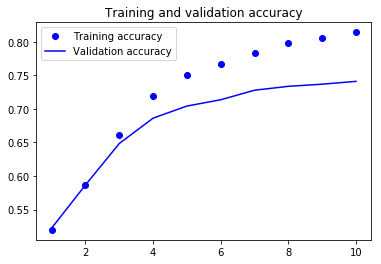

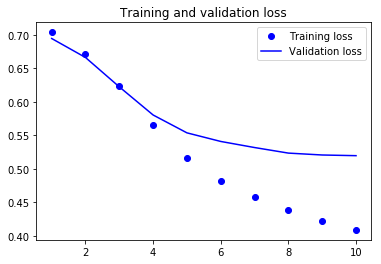

In [15]:
maxlen = 20
# Pads sequences to the same length (each sequence has the same length)
x_train = tf.keras.preprocessing.sequence.pad_sequences(x_train_raw, maxlen=maxlen)
x_test = tf.keras.preprocessing.sequence.pad_sequences(x_test_raw, maxlen=maxlen)

def get_model():
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Embedding(10000, 8, input_length=maxlen))
    model.add(tf.keras.layers.Flatten())
    model.add(tf.keras.layers.Dense(1, activation='sigmoid'))
    
    model.compile(
        optimizer='rmsprop',
        loss='binary_crossentropy',
        metrics=['acc'])
    model.summary()
    return model
    
model = get_model()
history = model.fit(
    x_train,
    y_train,
    epochs=10,
    batch_size=32,
    validation_split=0.2)

plot_history(history)

### Embedding and simple recurrent layer (SimpleRNN).

input_train shape: (25000, 500)
input_test shape: (25000, 500)
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
simple_rnn (SimpleRNN)       (None, 32)                2080      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 33        
Total params: 322,113
Trainable params: 322,113
Non-trainable params: 0
_________________________________________________________________
Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 22s 1ms/step - loss: 0.6793 - acc: 0.5631 - val_loss: 0.6813 - val_acc: 0.5718
Epoch 2/10
20000/20000 [==============================] - 21s 1ms/step - loss: 0.6240 - acc: 0.6432 - val_loss: 0.6050 - val_acc: 0.6666
Epoch 3/10
200

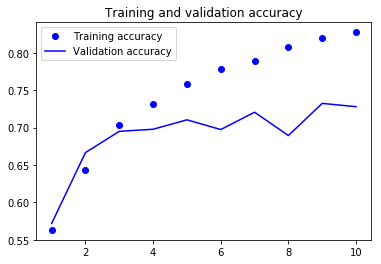

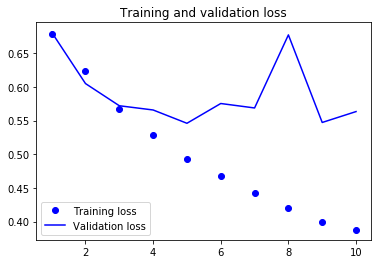

In [8]:
maxlen = 500
batch_size = 32

input_train = tf.keras.preprocessing.sequence.pad_sequences(x_train_raw, maxlen=maxlen)
input_test = tf.keras.preprocessing.sequence.pad_sequences(x_test_raw, maxlen=maxlen)

print('input_train shape:', input_train.shape)
print('input_test shape:', input_test.shape)

def get_model():
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Embedding(10000, 32))
    model.add(tf.keras.layers.SimpleRNN(32))
    model.add(tf.keras.layers.Dense(1, activation='sigmoid'))
    model.compile(
        optimizer='rmsprop',
        loss='binary_crossentropy',
        metrics=['acc'])
    model.summary()
    return model

model = get_model()
history = model.fit(
    input_train,
    y_train,
    epochs=10,
    batch_size=128,
    validation_split=0.2)

plot_history(history)

### Embedding and LSTM

input_train shape: (25000, 500)
input_test shape: (25000, 500)
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
lstm (LSTM)                  (None, 32)                8320      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 33        
Total params: 328,353
Trainable params: 328,353
Non-trainable params: 0
_________________________________________________________________
Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 76s 4ms/step - loss: 0.6820 - acc: 0.5571 - val_loss: 0.6905 - val_acc: 0.5300
Epoch 2/10
20000/20000 [==============================] - 77s 4ms/step - loss: 0.6098 - acc: 0.6647 - val_loss: 0.6660 - val_acc: 0.6178
Epoch 3/10
200

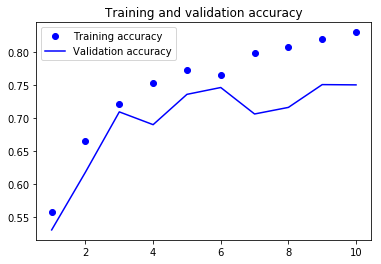

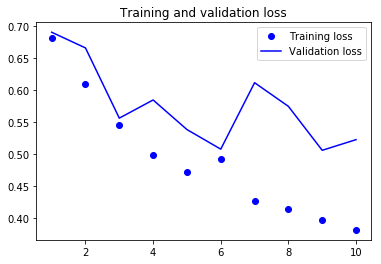

In [9]:
maxlen = 500
batch_size = 32

input_train = tf.keras.preprocessing.sequence.pad_sequences(x_train_raw, maxlen=maxlen)
input_test = tf.keras.preprocessing.sequence.pad_sequences(x_test_raw, maxlen=maxlen)

print('input_train shape:', input_train.shape)
print('input_test shape:', input_test.shape)

def get_model():
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Embedding(10000, 32))
    model.add(tf.keras.layers.LSTM(32))
    model.add(tf.keras.layers.Dense(1, activation='sigmoid'))
    model.compile(
        optimizer='rmsprop',
        loss='binary_crossentropy',
        metrics=['acc'])
    model.summary()
    return model

model = get_model()
history = model.fit(
    input_train,
    y_train,
    epochs=10,
    batch_size=128,
    validation_split=0.2)

plot_history(history)